In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic') 
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline


import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("./datasets/전처리준비/코스닥결측치처리완료_00.csv", index_col=0)
df['거래소코드'] =df['거래소코드'].astype(str).str.rjust(6,'0')
df['회계년도'] = df['회계년도'].astype(int)

ww_df = pd.read_csv('./datasets/전처리준비/WW지수.csv',index_col=0)
ww_df.drop(['설립일','부채'],axis=1,inplace=True)
ww_df['거래소코드'] =ww_df['거래소코드'].astype(str).str.rjust(6,'0')
ww_df['회계년도'] = ww_df['회계년도'].astype(int)


df = df.merge(ww_df,on=['회사명','거래소코드','회계년도'],how='left')

df[df["target_3"]==1]["target_3"].value_counts()


최종_col = ['abs(영업현금흐름-당기순이익)/매출액','금융비용부담률','WW지수' ,'누적수익성비율', 'TMD','순운전자본비율']

In [ ]:
## LR

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

df["Z"] = (df["abs(영업현금흐름-당기순이익)/매출액"]*2.516516) + (df["금융비용부담률"]*0.077222) + (df["WW지수"]*0.179561)+(df["누적수익성비율"]*-1.360175) + (df["TMD"]*0.647083) + (df["순운전자본비율"]*-0.016068)+ 4.10454281

df["proba"] = sigmoid(df["Z"]) *100
df["proba"].describe()

In [4]:
len(np.unique(df[df["target_3"]==1]["회사명"]))

149

In [6]:
df_12 = df[df["회계년도"] == 2012].reset_index(drop=True)
df_13 = df[df["회계년도"] == 2013].reset_index(drop=True)
df_14 = df[df["회계년도"] == 2014].reset_index(drop=True)
df_15 = df[df["회계년도"] == 2015].reset_index(drop=True)
df_16 = df[df["회계년도"] == 2016].reset_index(drop=True)
df_17 = df[df["회계년도"] == 2017].reset_index(drop=True)
df_18 = df[df["회계년도"] == 2018].reset_index(drop=True)
df_19 = df[df["회계년도"] == 2019].reset_index(drop=True)
df_20 = df[df["회계년도"] == 2020].reset_index(drop=True)
df_21 = df[df["회계년도"] == 2021].reset_index(drop=True)

print("------------------데이터 프레임 행 수")
print(len(df_12.index))
print(len(df_13.index))
print(len(df_14.index))
print(len(df_15.index))
print(len(df_16.index))
print(len(df_17.index))
print(len(df_18.index))
print(len(df_19.index))
print(len(df_20.index))
print(len(df_21.index))

------------------데이터 프레임 행 수
906
907
932
963
1024
1070
1132
1190
1244
1298


In [7]:
df_ls = [df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21]

임계_ls = []
for i in df_ls:
    정상기업점수평균 = np.mean(i[i["target_3"]==0]["proba"])
    부실기업점수평균 = np.mean(i[i["target_3"]==1]["proba"])

    정상기업수 = len(i[i["target_3"]==0].index)
    부실기업수 = len(i[i["target_3"]==1].index)

    임계점 = ((부실기업수 * 정상기업점수평균) + (정상기업수 * 부실기업점수평균)) / (정상기업수 + 부실기업수)
    임계_ls.append(임계점)



임계_df =pd.DataFrame({"임계_ls":임계_ls}, index=["2012", "2013","2014","2015","2016","2017","2018","2019","2020","2021"])
임계_df


,임계_ls
2012,55.483155
2013,47.049584
2014,60.026730
2015,49.655280
2016,48.118167
2017,37.916240
2018,49.971648
2019,67.996760
2020,66.249464
2021,76.984759


임계_ls    100.0
Name: 2012, dtype: float64 임계_ls    82.224563
dtype: float64 임계_ls    88.292039
dtype: float64 임계_ls    50.521274
dtype: float64 임계_ls    57.883889
dtype: float64 임계_ls    52.934868
dtype: float64 임계_ls    79.472454
dtype: float64 임계_ls    135.534013
dtype: float64 임계_ls    121.762872
dtype: float64 임계_ls    139.515
dtype: float64


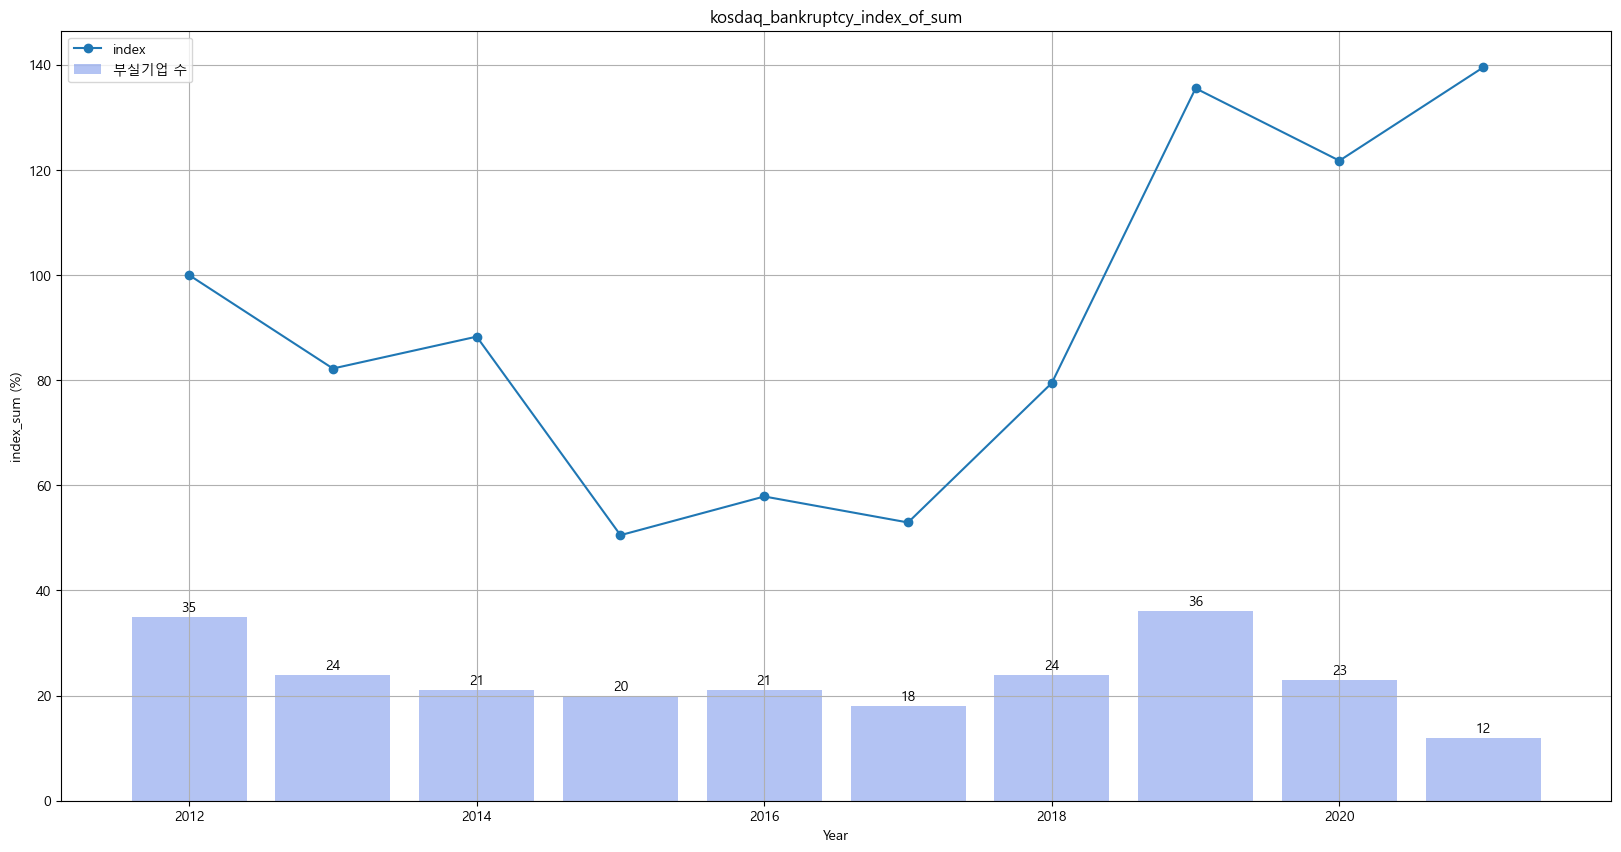

In [8]:
# # 각 연도의 데이터 수 계산
n_12 = len(df_12)
n_13 = len(df_13)
n_14 = len(df_14)
n_15 = len(df_15)
n_16 = len(df_16)
n_17 = len(df_17)
n_18 = len(df_18)
n_19 = len(df_19)
n_20 = len(df_20)
n_21 = len(df_21)


# 해당 년도 전체 기업 프로바 합계

sum_12proba =  df_12["proba"].sum() * 임계_df.iloc[0] 
sum_13proba =  df_13["proba"].sum() * 임계_df.iloc[1]
sum_14proba =  df_14["proba"].sum() * 임계_df.iloc[2] 
sum_15proba =  df_15["proba"].sum() * 임계_df.iloc[3] 
sum_16proba =  df_16["proba"].sum() * 임계_df.iloc[4] 
sum_17proba =  df_17["proba"].sum() * 임계_df.iloc[5] 
sum_18proba =  df_18["proba"].sum() * 임계_df.iloc[6] 
sum_19proba =  df_19["proba"].sum() * 임계_df.iloc[7] 
sum_20proba =  df_20["proba"].sum() * 임계_df.iloc[8] 
sum_21proba =  df_21["proba"].sum() * 임계_df.iloc[9] 


index_12 = ((sum_12proba/n_12)/(sum_12proba/n_12))*100
index_13 = ((sum_13proba/n_13)/(sum_12proba/n_12))*100
index_14 = ((sum_14proba/n_14)/(sum_12proba/n_12))*100
index_15 = ((sum_15proba/n_15)/(sum_12proba/n_12))*100
index_16 = ((sum_16proba/n_16)/(sum_12proba/n_12))*100
index_17 = ((sum_17proba/n_17)/(sum_12proba/n_12))*100
index_18 = ((sum_18proba/n_18)/(sum_12proba/n_12))*100
index_19 = ((sum_19proba/n_19)/(sum_12proba/n_12))*100
index_20 = ((sum_20proba/n_20)/(sum_12proba/n_12))*100
index_21 = ((sum_21proba/n_21)/(sum_12proba/n_12))*100

print(index_12, index_13,index_14,index_15,index_16,index_17,index_18,index_19,index_20,index_21)

# x축, y축 데이터 설정
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
kosdap_bankruptcy_index_of_sum = [index_12,index_13,index_14,index_15,index_16,index_17,index_18,index_19,index_20,index_21]

df_ls = [df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21]

ls = []
for i in df_ls:
    타겟수 = len(np.unique(i[i["target_3"]==1]["회사명"]))
    ls.append(타겟수)

타겟수_df =pd.DataFrame({"ls":ls}, index=["2012", "2013","2014","2015","2016","2017","2018","2019","2020","2021"])
# 타겟수_df


# 그래프 생성

plt.figure(figsize=(20, 10))
plt.plot(years, kosdap_bankruptcy_index_of_sum, marker='o',label = "index")
# plt.plot(years,임계_df["임계_ls"],marker='x',label = "임계")
plt.xlabel('Year')
plt.bar(years, 타겟수_df["ls"], color = "royalblue",alpha = 0.4,label='부실기업 수')
plt.ylabel('index_sum (%)')
plt.title('kosdaq_bankruptcy_index_of_sum')
plt.grid(True)
plt.legend()

# 각 지점의 값을 그래프에 표시

for i, v in enumerate(타겟수_df["ls"]):
    plt.text(years[i], v+0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.show()




In [9]:
print(n_12)
print(n_13)
print(n_14)
print(n_15)
print(n_16)
print(n_17)
print(n_18)
print(n_19)
print(n_20)
print(n_21)

print("-------------------------------------------")

print(len(df_12[(df_12["proba"]>임계_ls[0]) & (df_12["target"]==0)]["회사명"]))
print(len(df_13[(df_13["proba"]>임계_ls[0]) & (df_13["target"]==0)]["회사명"]))
print(len(df_14[(df_14["proba"]>임계_ls[0]) & (df_14["target"]==0)]["회사명"]))
print(len(df_15[(df_15["proba"]>임계_ls[0]) & (df_15["target"]==0)]["회사명"]))
print(len(df_16[(df_16["proba"]>임계_ls[0]) & (df_16["target"]==0)]["회사명"]))
print(len(df_17[(df_17["proba"]>임계_ls[0]) & (df_17["target"]==0)]["회사명"]))
print(len(df_18[(df_18["proba"]>임계_ls[0]) & (df_18["target"]==0)]["회사명"]))
print(len(df_19[(df_19["proba"]>임계_ls[0]) & (df_19["target"]==0)]["회사명"]))
print(len(df_20[(df_20["proba"]>임계_ls[0]) & (df_20["target"]==0)]["회사명"]))
print(len(df_21[(df_21["proba"]>임계_ls[0]) & (df_21["target"]==0)]["회사명"]))


print(df_12["target_3"].value_counts())
print(df_12[(df_12["proba"]>임계_ls[0])]["target_3"].value_counts())


print(len(np.unique(df[df["proba"]>=90]["회사명"])))
# print(np.unique(df[(df["proba"]>=90) & (df["target_3"]==0)]["회사명"]))
print(len(np.unique(df[(df["proba"]>=90) & (df["target_3"]==0)]["회사명"])))
print(len(np.unique(df[(df["proba"]>=90) & (df["target_3"]==1)]["회사명"])))

906
907
932
963
1024
1070
1132
1190
1244
1298
-------------------------------------------
34
38
33
15
22
39
46
64
57
69
0    871
1     35
Name: target_3, dtype: int64
0    29
1    19
Name: target_3, dtype: int64
192
136
77


---
## 타겟 1 과 ㅇ 의 프로바 분포

<AxesSubplot:xlabel='target_3', ylabel='proba'>

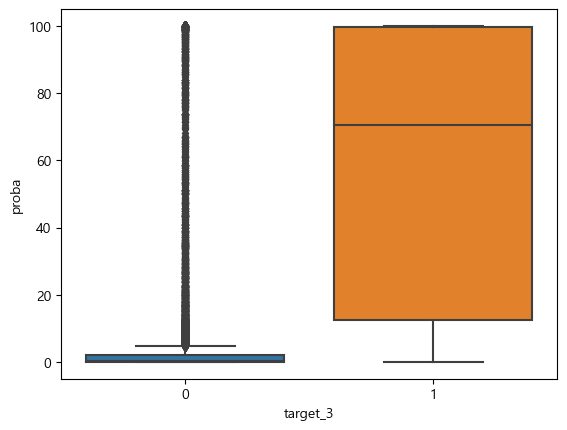

In [10]:
sns.boxplot(y=df["proba"],x=df["target_3"], data=df)

---
## 타겟이 0인 기업이 임계점 이상의 프로바를 가질때 그 기업이 n년 이내에 도산할 확률 구하기

In [11]:
부실_df = df[df["target"]==1][["회사명", "거래소코드", "회계년도", "target", "proba"]]

df_12_임계 = df_12[(df_12["proba"]>임계_ls[0]) & (df_12["target"]==0)][["회사명", "회계년도","target"]]
df_13_임계 = df_13[(df_13["proba"]>임계_ls[1]) & (df_13["target"]==0)][["회사명", "회계년도","target"]]
df_14_임계 = df_14[(df_14["proba"]>임계_ls[2]) & (df_14["target"]==0)][["회사명", "회계년도","target"]]
df_15_임계 = df_15[(df_15["proba"]>임계_ls[3]) & (df_15["target"]==0)][["회사명", "회계년도","target"]]
df_16_임계 = df_16[(df_16["proba"]>임계_ls[4]) & (df_16["target"]==0)][["회사명", "회계년도","target"]]
df_17_임계 = df_17[(df_17["proba"]>임계_ls[5]) & (df_17["target"]==0)][["회사명", "회계년도","target"]]
df_18_임계 = df_18[(df_18["proba"]>임계_ls[6]) & (df_18["target"]==0)][["회사명", "회계년도","target"]]
df_19_임계 = df_19[(df_19["proba"]>임계_ls[7]) & (df_19["target"]==0)][["회사명", "회계년도","target"]]
df_20_임계 = df_20[(df_20["proba"]>임계_ls[8]) & (df_20["target"]==0)][["회사명", "회계년도","target"]]
df_21_임계 = df_21[(df_21["proba"]>임계_ls[9]) & (df_21["target"]==0)][["회사명", "회계년도","target"]]

df_임계 = pd.concat([df_12_임계,df_13_임계,df_14_임계,df_15_임계,df_16_임계,df_17_임계,df_18_임계,df_19_임계,df_20_임계,df_21_임계], axis=0)

df_임계["회사명"].drop_duplicates(keep="first", inplace=True)




In [12]:
#  12 ~ 17년 

ls_y = [2012, 2013, 2014, 2015, 2016, 2017]
확률 = []

for i in ls_y:
    # 실제 부실이 된 기업 리스트
    actual_default = np.unique(부실_df[부실_df["회계년도"]<=i+5]["회사명"].to_list())

    # 부실이라고 예측한 기업 리스트
    predicted_default =df_임계[df_임계["회계년도"]==i]["회사명"].to_list()

    # 부실이라고 예측한 기업들 중 실제로 부실이 된 기업들의 비율 계산
    num_predicted_default = len(predicted_default)
    num_actual_default = len(actual_default)
    num_true_positives = len(set(actual_default) & set(predicted_default))
    
    확률.append(num_true_positives/num_predicted_default)

확률

[0.2647058823529412,
 0.1590909090909091,
 0.3,
 0.1875,
 0.32,
 0.29545454545454547]

In [13]:
#  12 ~ 17년 

ls_y = [2018,2019,2020]
확률 = []

for i in ls_y:
    # 실제 부실이 된 기업 리스트
    actual_default = np.unique(부실_df[부실_df["회계년도"]<=2021]["회사명"].to_list())

    # 부실이라고 예측한 기업 리스트
    predicted_default =df_임계[df_임계["회계년도"]==i]["회사명"].to_list()

    # 부실이라고 예측한 기업들 중 실제로 부실이 된 기업들의 비율 계산
    num_predicted_default = len(predicted_default)
    num_actual_default = len(actual_default)
    num_true_positives = len(set(actual_default) & set(predicted_default))
    
    확률.append(num_true_positives/num_predicted_default)

확률

[0.3125, 0.21818181818181817, 0.1568627450980392]

---
## 회생 된 기업과 회생 인가 후 상폐 된 기업 재무 차이 시각화 

In [14]:
회생상폐_df = pd.read_csv("./datasets/y/중복있음.csv", index_col=0)
회생상폐_df.drop(columns=["번호"], axis=1, inplace=True)
회생상폐_df["거래소코드"] = 회생상폐_df["거래소코드"].astype("str").str.rjust(6,"0")
회생상폐_df = 회생상폐_df[(회생상폐_df["회계년도"]>2010) & (회생상폐_df["회계년도"]<2022)]

In [15]:
회생_ls = 회생상폐_df[회생상폐_df["공시제목"] == "회생절차개시결정"]["거래소코드"].to_list()
상폐_ls = 회생상폐_df[회생상폐_df["공시제목"] == "상장폐지기업"]["거래소코드"].to_list()  


list1 = 회생_ls
list2 = 상폐_ls
# 중복되는 값 추출
intersection = list(set(list1) & set(list2))

# 중복되지 않는 값 추출
difference = list(set(list1) ^ set(list2))

print("회생 인가 후 상폐 된 기업 수:",len(np.unique(intersection)))
print("회생이나 상폐만 된 기업 수 : ",len(difference))
print("회생 인가 후 상폐 된 기업거래소 코드:", intersection)
# print("difference:", difference)


회생 인가 후 상폐 된 기업 수: 55
회생이나 상폐만 된 기업 수 :  242
회생 인가 후 상폐 된 기업거래소 코드: ['155960', '053330', '189540', '050470', '005900', '066060', '141070', '111820', '002530', '011720', '110570', '066110', '000360', '080440', '329050', '056710', '000420', '226350', '053660', '087730', '091690', '160350', '013340', '094700', '065940', '006440', '086250', '158310', '103130', '026250', '000800', '036210', '033110', '134780', '004320', '001310', '032040', '090120', '004550', '111610', '176440', '004740', '008800', '068630', '074000', '065160', '007150', '094190', '117930', '039670', '012650', '036260', '088700', '014350', '309900']


In [16]:
회생후상폐_ls = 회생상폐_df[회생상폐_df["거래소코드"].isin(intersection)]["거래소코드"]
상폐후상폐_ls = 회생상폐_df[(회생상폐_df["공시제목"] == "상장폐지기업") & (~회생상폐_df["거래소코드"].isin(intersection))]["거래소코드"]


회생후상폐_df= df[df["거래소코드"].isin(회생후상폐_ls)]
회생후회생_df= df[df["공시제목"]=="회생절차개시결정"]
상폐후상폐_df= df[df["거래소코드"].isin(상폐후상폐_ls)]

In [17]:
print(len(np.unique(df[df["target_3"]==1]["회사명"])))
print(len(np.unique(회생후상폐_df["회사명"])))
print(len(np.unique(회생후회생_df["회사명"])))
print(len(np.unique(상폐후상폐_df["회사명"])))
print(88+34+27)

149
27
34
88
149


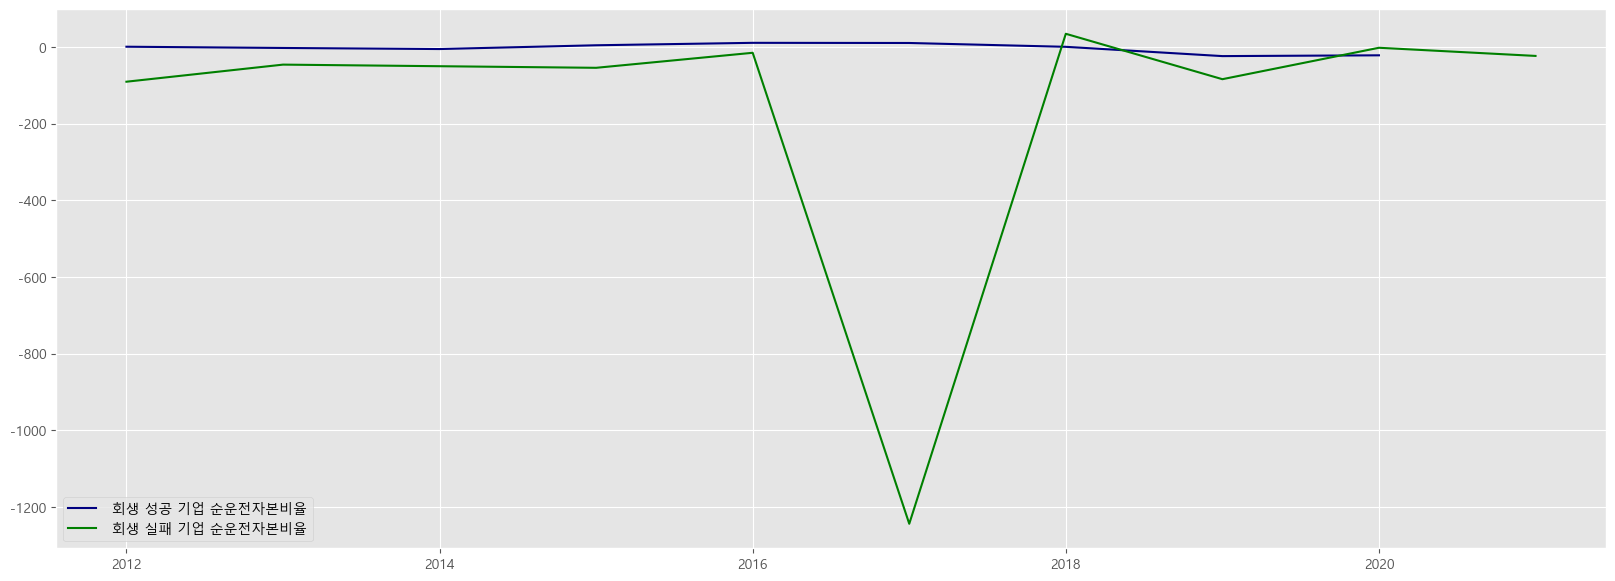

In [18]:
# 회생 성공 기업 과 회생 실패 기업 순운전자본비율 비교

회생실패기업 = 회생후상폐_df.groupby("회계년도")['순운전자본비율'].mean().reset_index()
회생성공기업 = 회생후회생_df.groupby("회계년도")['순운전자본비율'].mean().reset_index()



plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(회생실패기업["회계년도"],회생실패기업['순운전자본비율'], color='navy',label = " 회생 성공 기업 순운전자본비율")
plt.plot(회생성공기업["회계년도"],회생성공기업['순운전자본비율'], color='g',label = " 회생 실패 기업 순운전자본비율")
# plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "회생절차/상장폐지 인가 시점")
plt.grid(True)
plt.legend()
plt.show()



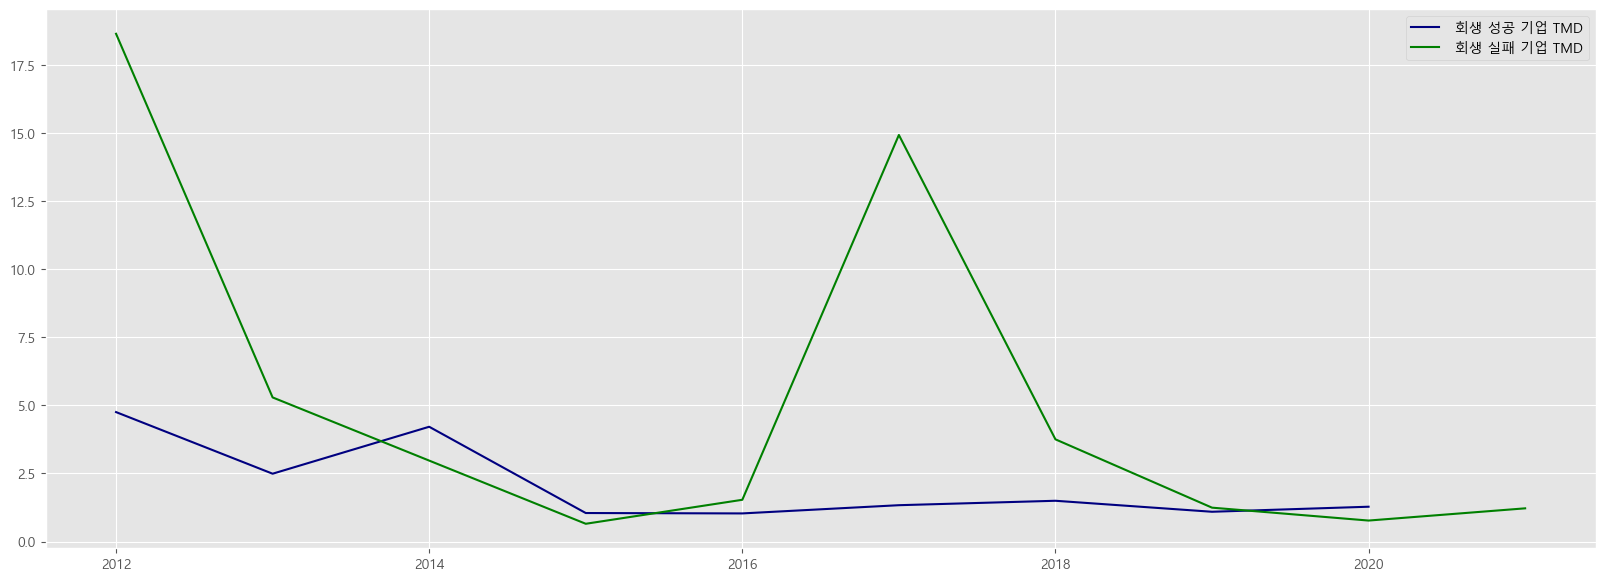

In [19]:
# 회생 성공 기업 과 회생 실패 기업 TMD 비교

회생실패기업 = 회생후상폐_df.groupby("회계년도")['TMD'].mean().reset_index()
회생성공기업 = 회생후회생_df.groupby("회계년도")['TMD'].mean().reset_index()



plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(회생실패기업["회계년도"],회생실패기업['TMD'], color='navy',label = " 회생 성공 기업 TMD")
plt.plot(회생성공기업["회계년도"],회생성공기업['TMD'], color='g',label = " 회생 실패 기업 TMD")
# plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "회생절차/상장폐지 인가 시점")
plt.grid(True)
plt.legend()
plt.show()



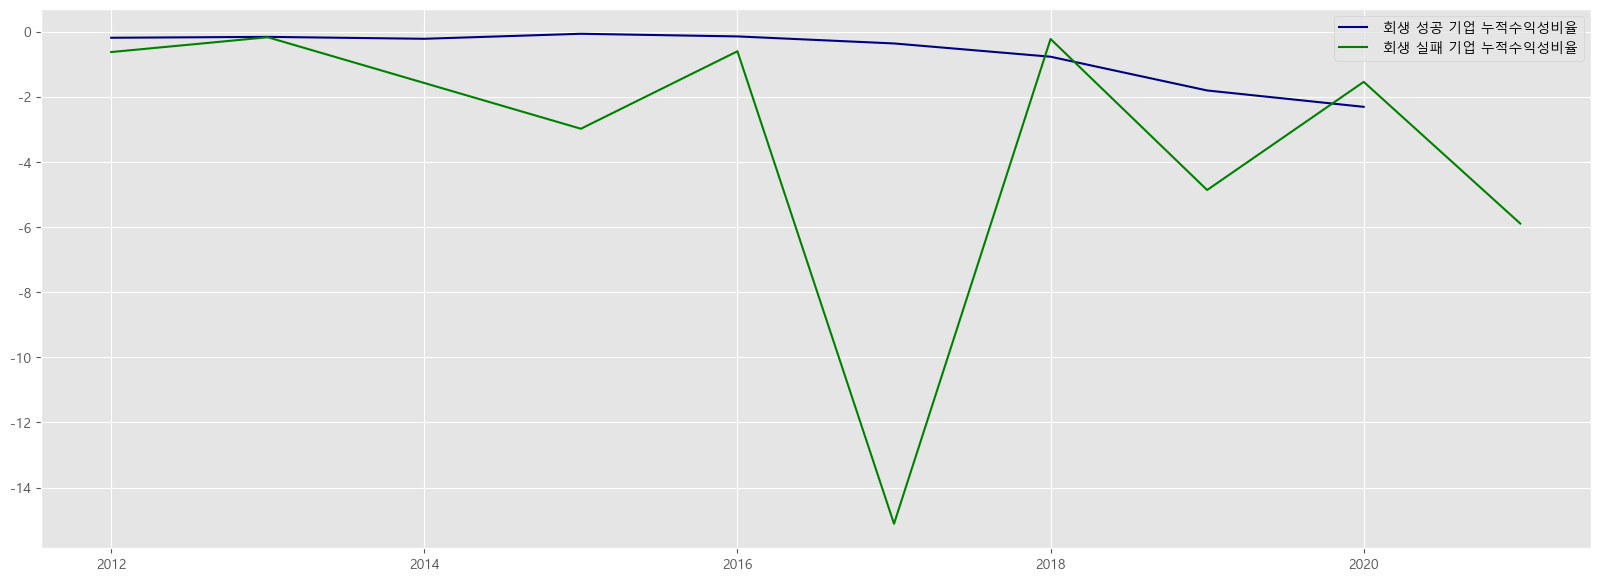

In [20]:
# 회생 성공 기업 과 회생 실패 기업 누적수익성비율 비교

회생실패기업 = 회생후상폐_df.groupby("회계년도")['누적수익성비율'].mean().reset_index()
회생성공기업 = 회생후회생_df.groupby("회계년도")['누적수익성비율'].mean().reset_index()



plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(회생실패기업["회계년도"],회생실패기업['누적수익성비율'], color='navy',label = " 회생 성공 기업 누적수익성비율")
plt.plot(회생성공기업["회계년도"],회생성공기업['누적수익성비율'], color='g',label = " 회생 실패 기업 누적수익성비율")
# plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "회생절차/상장폐지 인가 시점")
plt.grid(True)
plt.legend()
plt.show()



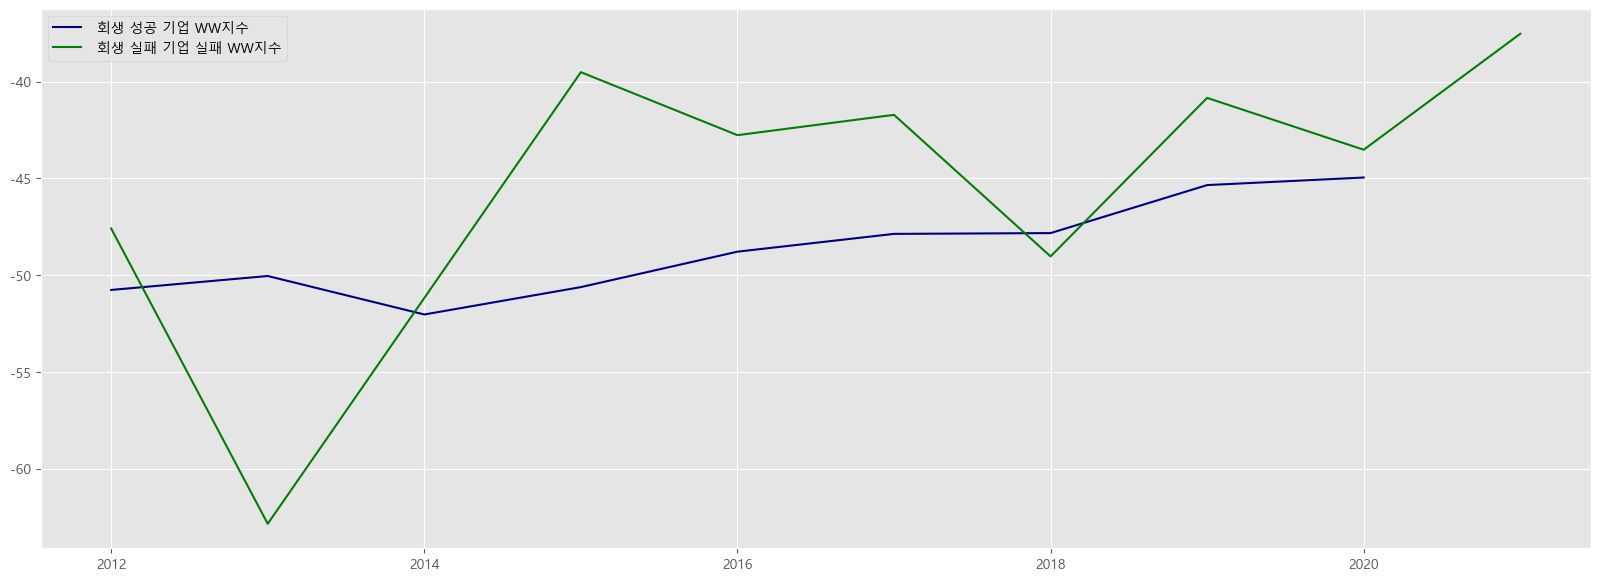

In [21]:
# 회생 성공 기업 과 회생 실패 기업 WW지수 비교

회생실패기업 = 회생후상폐_df.groupby("회계년도")['WW지수'].mean().reset_index()
회생성공기업 = 회생후회생_df.groupby("회계년도")['WW지수'].mean().reset_index()



plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(회생실패기업["회계년도"],회생실패기업['WW지수'], color='navy',label = " 회생 성공 기업 WW지수")
plt.plot(회생성공기업["회계년도"],회생성공기업['WW지수'], color='g',label = " 회생 실패 기업 실패 WW지수")
# plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "회생절차/상장폐지 인가 시점")
plt.grid(True)
plt.legend()
plt.show()



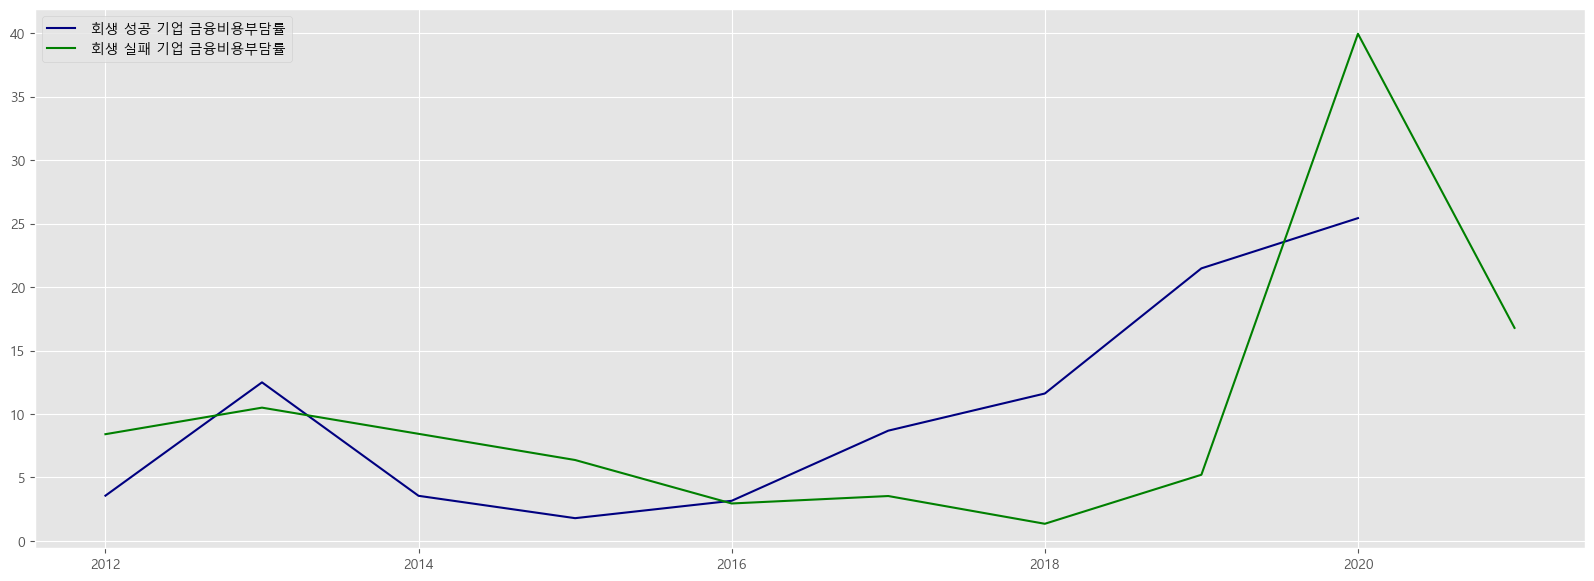

In [22]:
# 회생 성공 기업 과 회생 실패 기업 금융비용부담률 비교

회생실패기업 = 회생후상폐_df.groupby("회계년도")['금융비용부담률'].mean().reset_index()
회생성공기업 = 회생후회생_df.groupby("회계년도")['금융비용부담률'].mean().reset_index()



plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(회생실패기업["회계년도"],회생실패기업['금융비용부담률'], color='navy',label = " 회생 성공 기업 금융비용부담률")
plt.plot(회생성공기업["회계년도"],회생성공기업['금융비용부담률'], color='g',label = " 회생 실패 기업 금융비용부담률")
# plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "회생절차/상장폐지 인가 시점")
plt.grid(True)
plt.legend()
plt.show()



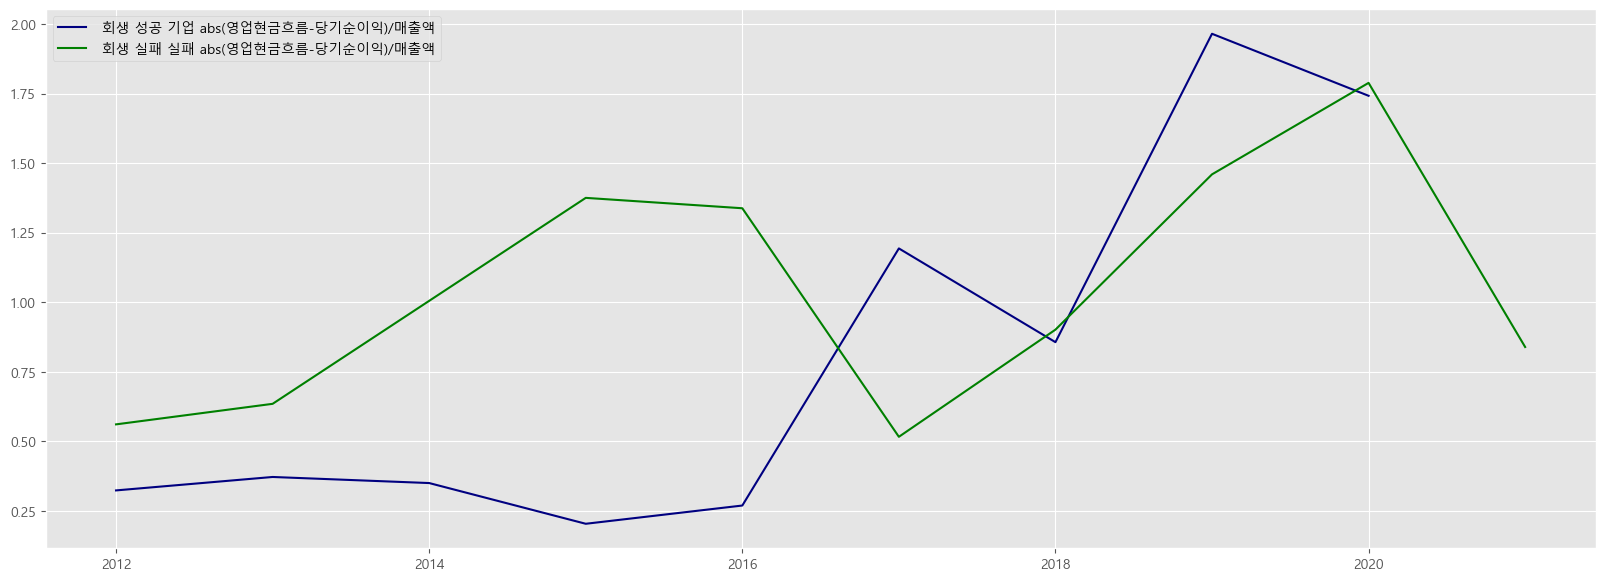

In [23]:
# 회생 성공 기업 과 회생 실패 기업 abs(영업현금흐름-당기순이익)/매출액 비교

회생실패기업 = 회생후상폐_df.groupby("회계년도")['abs(영업현금흐름-당기순이익)/매출액'].mean().reset_index()
회생성공기업 = 회생후회생_df.groupby("회계년도")['abs(영업현금흐름-당기순이익)/매출액'].mean().reset_index()



plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(회생실패기업["회계년도"],회생실패기업['abs(영업현금흐름-당기순이익)/매출액'], color='navy',label = " 회생 성공 기업 abs(영업현금흐름-당기순이익)/매출액")
plt.plot(회생성공기업["회계년도"],회생성공기업['abs(영업현금흐름-당기순이익)/매출액'], color='g',label = " 회생 실패 실패 abs(영업현금흐름-당기순이익)/매출액")
# plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "회생절차/상장폐지 인가 시점")
plt.grid(True)
plt.legend()
plt.show()



---
# 19년도 기준 회생기업와 상장폐지 기업 프로바 추이

In [24]:
#  시각화 용 기업 분리

회생_pretty_co = ["(주)골드앤에스", "에스비더블유생명과학(주)",'(주)상상인인더스트리','(주)시너지이노베이션', '(주)아이톡시','(주)케이에스피','(주)휴먼엔','(주)휴엠앤씨','씨앤티85(주)','에스비더블유생명과학(주)',
                "엘컴텍(주)",]

pretty = ["(주)드림티엔터테인먼트",'(주)디에스앤엘','(주)리드','(주)매직마이크로','(주)맥스로텍','(주)모다','(주)모린스','(주)무궁화인포메이션테크놀로지','(주)미래SCI','(주)바이오빌','(주)베스파','(주)비츠로시스','(주)스틸플라워','(주)씨엘인터내셔널',
          '(주)아리온테크놀로지','(주)아이디에스','(주)아이엠텍', '(주)아이팩토리','(주)에스마크','(주)에스에스컴텍','(주)에스제이케이','(주)에프티이앤이','(주)엘피케이로보틱스', '(주)엠제이비','(주)와이즈파워',
           '(주)우전','(주)위너지스','(주)이엠네트웍스','(주)이엠앤아이','(주)제낙스','(주)제이웨이','(주)코너스톤네트웍스','(주)코스온','(주)코썬바이오','(주)태창파로스','(주)터보테크', '(주)티에스엠텍','(주)파티게임즈'
           ,'(주)팍스넷','(주)피앤텔','(주)행남사', '럭슬(주)','마이크로로봇(주)','아이이(주)','에스지에이클라우드서비스(주)','에이스하이텍(주)','이엘케이(주)','잘만테크(주)','지나인제약(주)']

별로인친구들 = ["(주)나노트로닉스","(주)네오퍼플","(주)넥스지",  "(주)디에스",'(주)라이트론', '(주)렉스엘이앤지',"(주)룩손에너지홀딩스",
         '(주)마이스코','(주)비엔씨컴퍼니','(주)삼우이엠씨','(주)승화프리텍','(주)씨그널엔터테인먼트그룹','(주)씨앤에스자산관리','(주)씨앤케이인터내셔널'
         ,'(주)씨유전자','(주)아라온테크','(주)아이티엑스에이아이','(주)아큐텍','(주)에듀언스','(주)에스비엠', '(주)에스에프씨','(주)에이제이에스','(주)에이치디','(주)에이팸', '(주)에임하이글로벌'
         ,'(주)엔에스브이', '(주)엔지스테크널러지','(주)엔터기술','(주)엘아이에스','(주)영진코퍼레이션','(주)예당컴퍼니','(주)우성아이비','(주)위노바','(주)위다스','(주)유니드코리아', '(주)유디피','(주)유에이블',
         '(주)유일엔시스','(주)이매진아시아','(주)자유투어','(주)제이테크놀로지','(주)좋은사람들','(주)지디','(주)지아이바이오','(주)지앤에스티','(주)지유온','(주)지티앤티','(주)케스피온','(주)케이엔씨글로벌',
         '(주)코데즈컴바인','(주)테라리소스','(주)테크엘','(주)트레이스','(주)파인넥스','(주)퓨전','(주)프리젠','(주)피엘에이','(주)하이소닉','(주)해피드림','(주)화신테크','(주)화진', '(주)휴먼텍코리아','KCW(주)'
         ,'디브이에스코리아(주)','디에스티(주)','레이젠(주)','비디아이(주)','쌍용건설(주)','에버테크노(주)','에이아이비트(주)','엠텍비젼(주)','우경(주)', '우양에이치씨(주)','울트라건설(주)','이디디컴퍼니(주)',
         '제이앤유글로벌','태산엘시디(주)']

프로바는_낮지만_변화는_큰_기업 = ["(주)금빛","(주)데코앤이","(주)디아이디","(주)디지텍시스템스", '(주)디피앤케이','(주)삼표시멘트','(주)썬코어','(주)썬테크놀로지스','크로바하이텍(주)','한솔신텍(주)', '휴림네트웍스(주)']

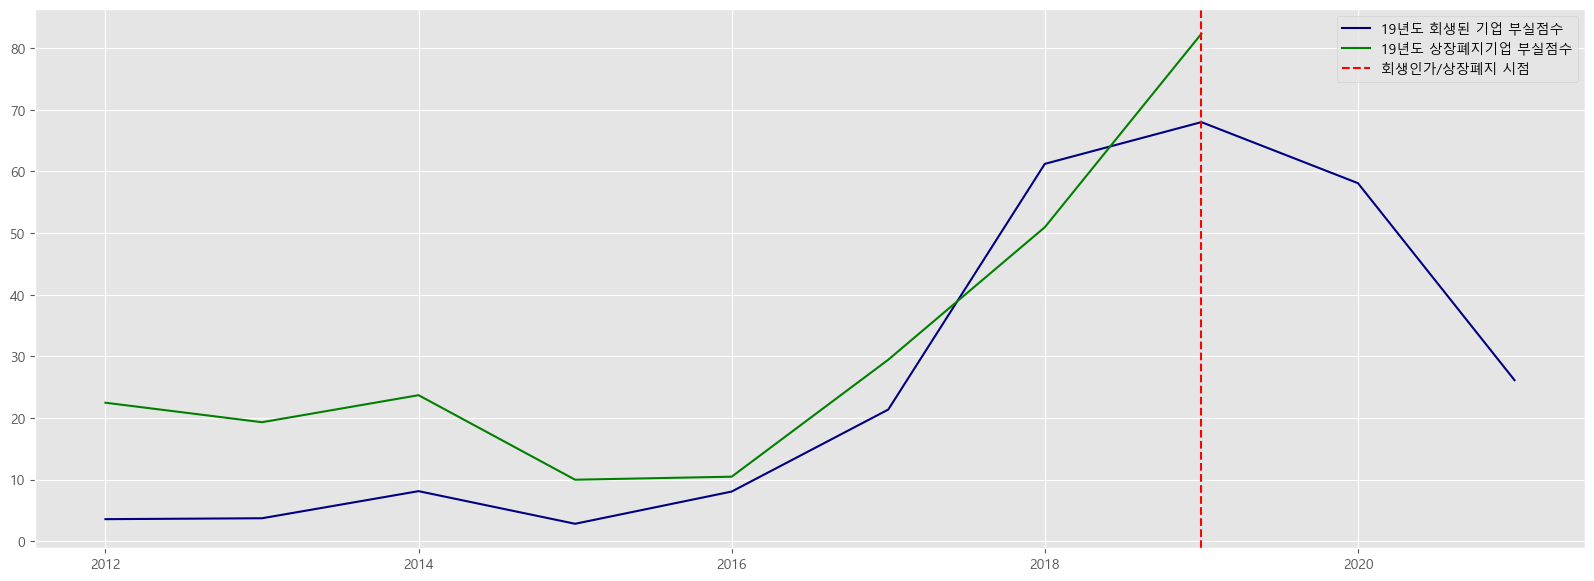

In [25]:
# 19년도에 회생 절차가 개시된 기업 프로바 추이  

df_회생_19 = df[(df["회계년도"]==2019)&(df["공시제목"]=="회생절차개시결정")]
df_회생_mean = df[(df["회사명"].isin(df_회생_19["회사명"]))].groupby(["회계년도"])["proba"].mean().reset_index()
df_상폐_19 = df[(df["회계년도"]==2019)&(df["공시제목"]=="상장폐지기업")]
df_상폐_mean = df[(df["회사명"].isin(df_상폐_19["회사명"]))].groupby(["회계년도"])["proba"].mean().reset_index()

plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(df_회생_mean["회계년도"],df_회생_mean["proba"], color='navy',label = "19년도 회생된 기업 부실점수")
plt.plot(df_상폐_mean["회계년도"],df_상폐_mean["proba"], color='g',label = "19년도 상장폐지기업 부실점수")
plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "회생인가/상장폐지 시점")
plt.grid(True)
plt.legend()
plt.show()

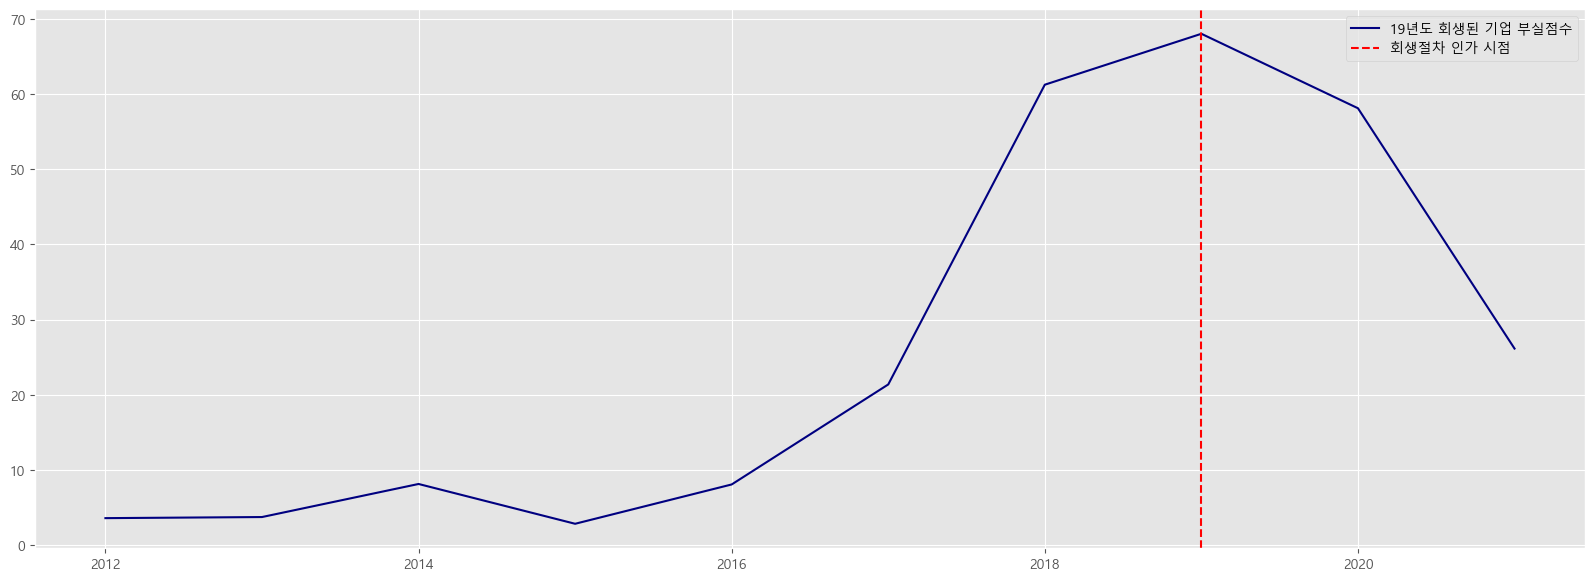

In [26]:
# 19년도에 회생 절차가 개시된 기업 프로바 추이  

df_회생_19 = df[(df["회계년도"]==2019)&(df["공시제목"]=="회생절차개시결정")]

df_회생_mean = df[(df["회사명"].isin(df_회생_19["회사명"]))].groupby(["회계년도"])["proba"].mean().reset_index()

plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(df_회생_mean["회계년도"],df_회생_mean["proba"], color='navy',label = "19년도 회생된 기업 부실점수")
plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "회생절차 인가 시점")
plt.grid(True)
plt.legend()
plt.show()

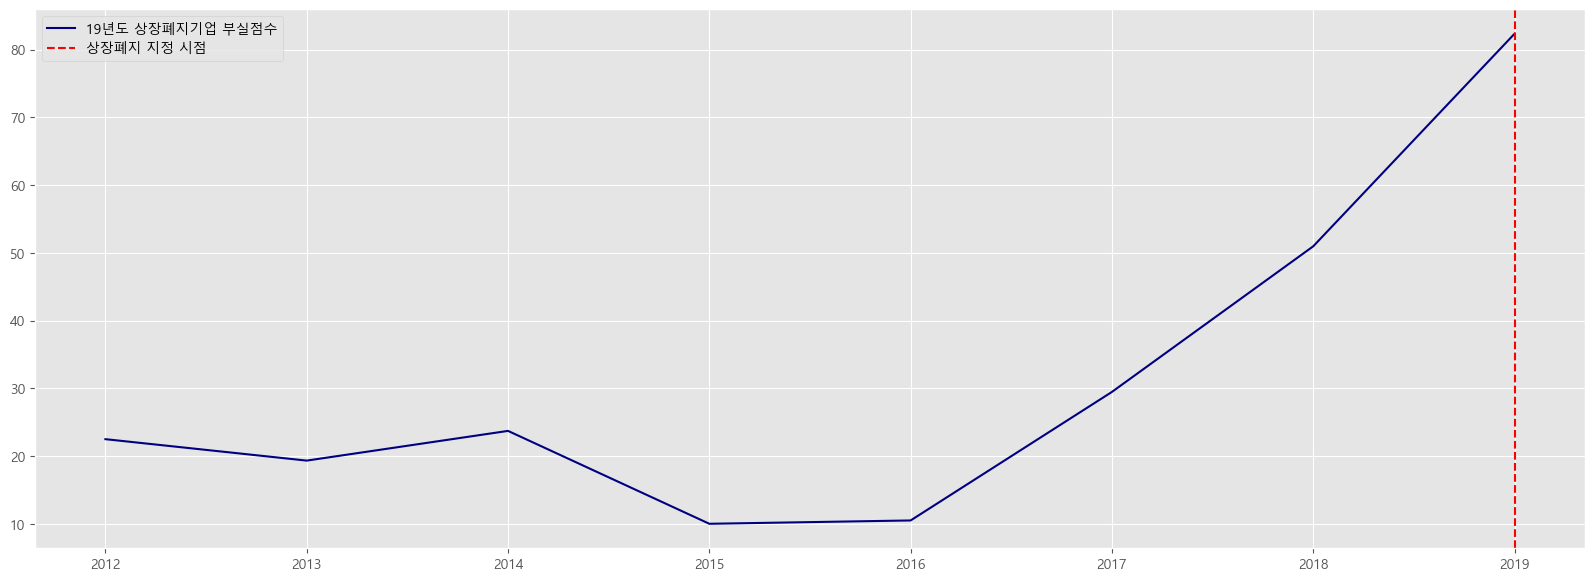

In [27]:
# 19년도에 상폐 절차가 개시된 기업 프로바 추이  

df_상폐_19 = df[(df["회계년도"]==2019)&(df["공시제목"]=="상장폐지기업")]

df_상폐_mean = df[(df["회사명"].isin(df_상폐_19["회사명"]))].groupby(["회계년도"])["proba"].mean().reset_index()

plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(df_상폐_mean["회계년도"],df_상폐_mean["proba"], color='navy',label = "19년도 상장폐지기업 부실점수")
plt.axvline(x = 2019, color = "r", linestyle='--', linewidth=1.5, label = "상장폐지 지정 시점")
plt.grid(True)
plt.legend()
plt.show()

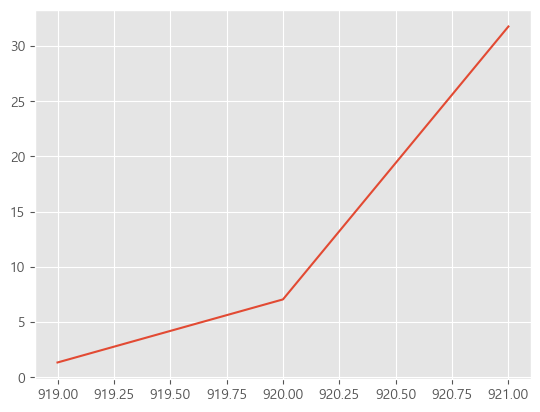

In [28]:
plt.style.use("ggplot")
plt.plot(df[df["회사명"]=='(주)디아이디']["proba"]) # 프로바 자체는 낮지만 변화폭이 큰 기업 프로바 추이

---
## 타겟 별 특징 비교

In [29]:
print(df[df["회사명"].isin(df[df["target_1"]==1]["회사명"].drop_duplicates(keep="first"))]["proba"].mean())
print(df[df["회사명"].isin(df[df["target_2"]==1]["회사명"].drop_duplicates(keep="first"))]["proba"].mean())
print(df[df["회사명"].isin(df[df["target_3"]==1]["회사명"].drop_duplicates(keep="first"))]["proba"].mean())

28.932399879202254
28.932399879202254
28.932399879202254


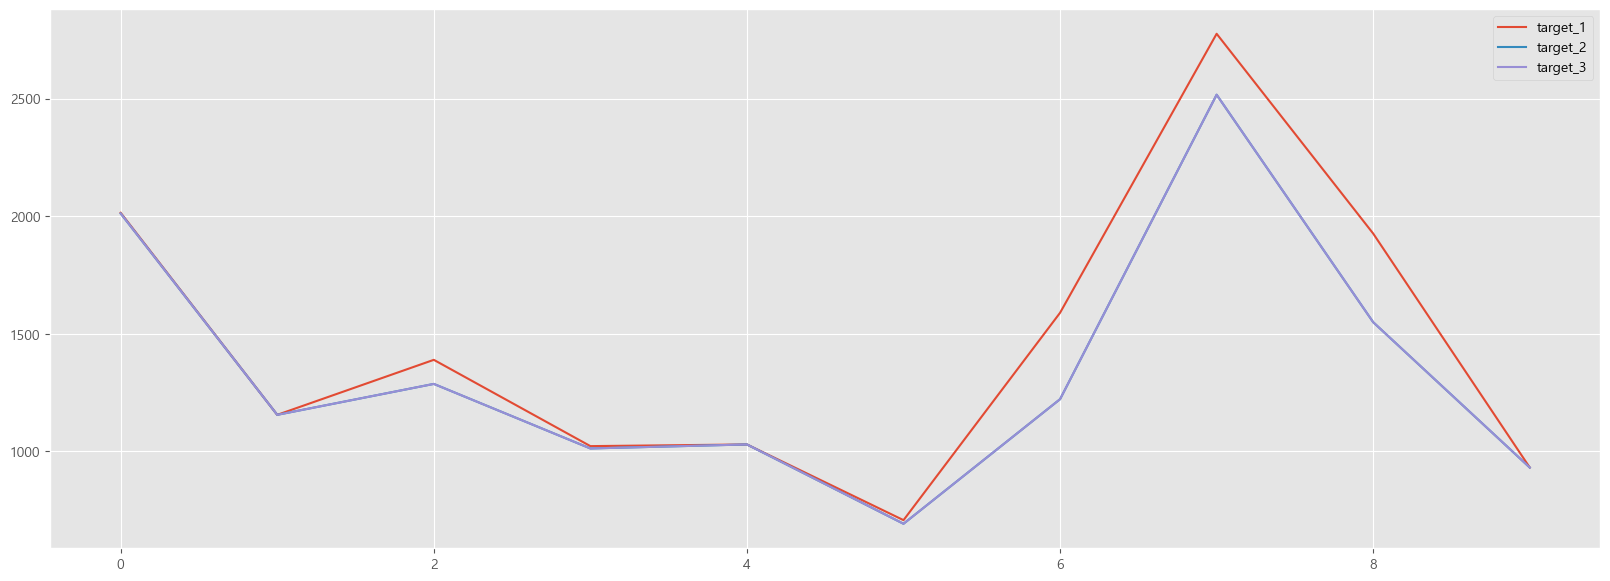

In [30]:
proba_sum_1 =  df[df["target_1"]==1].groupby(["회계년도"])["proba"].sum().reset_index()
proba_sum_2 =  df[df["target_2"]==1].groupby(["회계년도"])["proba"].sum().reset_index()
proba_sum_3 =  df[df["target_3"]==1].groupby(["회계년도"])["proba"].sum().reset_index()

plt.figure(figsize=(20,7))
plt.style.use("ggplot")
plt.plot(proba_sum_1["proba"], label = "target_1")
plt.plot(proba_sum_2["proba"], label = "target_2")
plt.plot(proba_sum_3["proba"], label = "target_3")
plt.legend()
plt.grid(True)
plt.show()


---
## 대주주 지분 변화

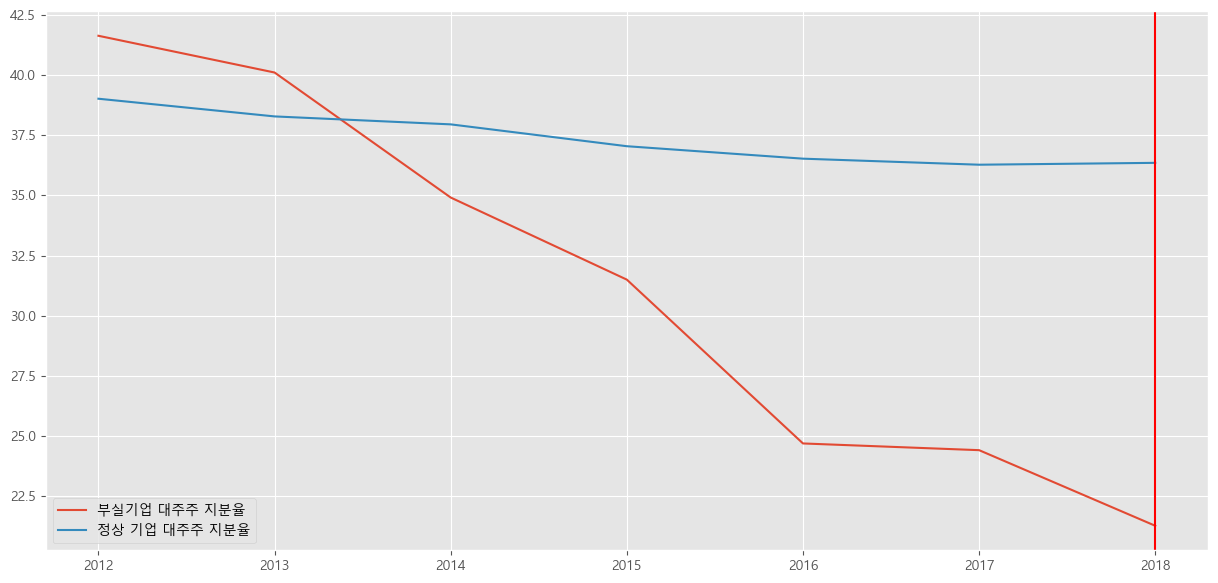

In [31]:
# 18년도 기전 부도난 기업과 정상 기업의 대주주 지분율 변동 추이

df_대주주_18 = df[(df["회계년도"]==2018)&(df["target_3"]==1)]
df_대주주_18_mean = df[(df["회사명"].isin(df_대주주_18["회사명"]))& (df["회계년도"]<=2018)].groupby(["회계년도"])["대주주지분율"].mean().reset_index()
df_대주주_18_0 = df[(df["회계년도"]==2018)&(df["target_3"]==0)]
df_대주주_18_mean_0 = df[(df["회사명"].isin(df_대주주_18_0["회사명"]))& (df["회계년도"]<=2018)].groupby(["회계년도"])["대주주지분율"].mean().reset_index()

plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.plot(df_대주주_18_mean["회계년도"],df_대주주_18_mean["대주주지분율"],label = "부실기업 대주주 지분율")
plt.plot(df_대주주_18_mean_0["회계년도"],df_대주주_18_mean_0["대주주지분율"], label = "정상 기업 대주주 지분율")
plt.legend()
plt.axvline(x = 2018, color = "r")
plt.show()

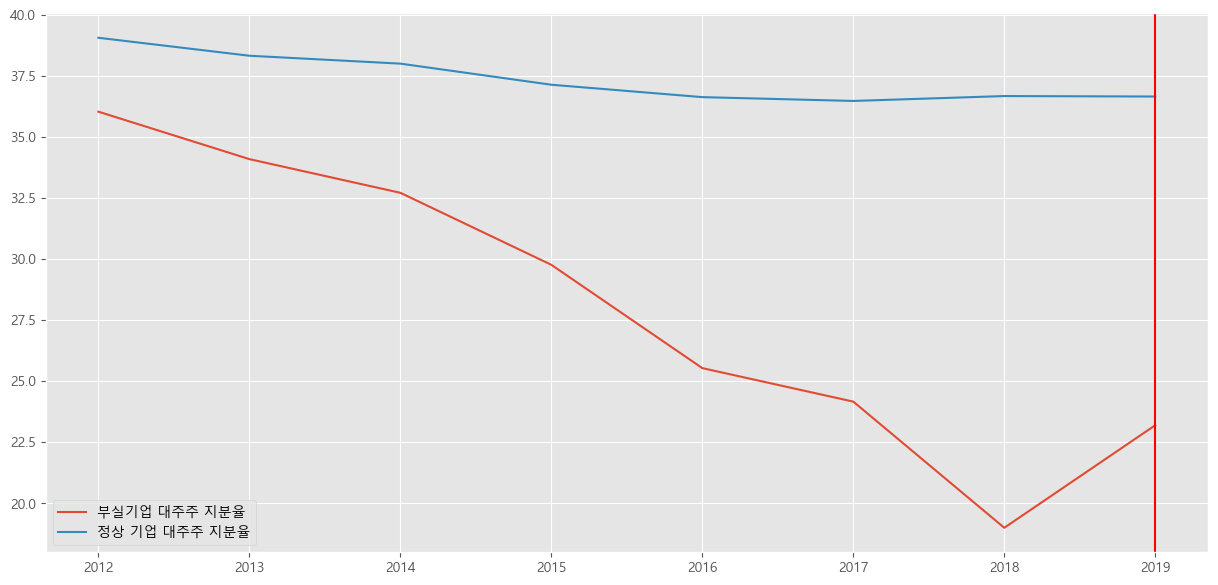

In [32]:
# 19년도 기전 부도난 기업과 정상 기업의 대주주 지분율 변동 추이

df_대주주_19 = df[(df["회계년도"]==2019)&(df["target_3"]==1)]
df_대주주_19_mean = df[(df["회사명"].isin(df_대주주_19["회사명"]))& (df["회계년도"]<=2019)].groupby(["회계년도"])["대주주지분율"].mean().reset_index()
df_대주주_19_0 = df[(df["회계년도"]==2019)&(df["target_3"]==0)]
df_대주주_19_mean_0 = df[(df["회사명"].isin(df_대주주_19_0["회사명"]))& (df["회계년도"]<=2019)].groupby(["회계년도"])["대주주지분율"].mean().reset_index()

plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.plot(df_대주주_19_mean["회계년도"],df_대주주_19_mean["대주주지분율"],label = "부실기업 대주주 지분율")
plt.plot(df_대주주_19_mean_0["회계년도"],df_대주주_19_mean_0["대주주지분율"], label = "정상 기업 대주주 지분율")
plt.legend()
plt.axvline(x = 2019, color = "r")
plt.show()

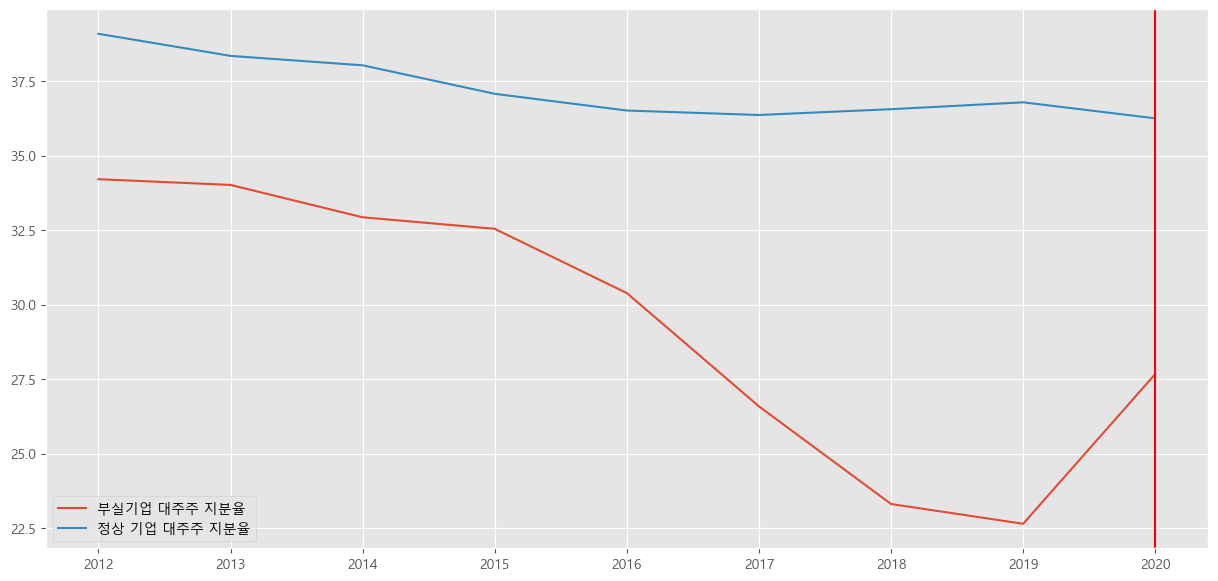

In [33]:
# 20년도 기전 부도난 기업과 정상 기업의 대주주 지분율 변동 추이

df_대주주_20 = df[(df["회계년도"]==2020)&(df["target_3"]==1)]
df_대주주_20_mean = df[(df["회사명"].isin(df_대주주_20["회사명"]))& (df["회계년도"]<=2020)].groupby(["회계년도"])["대주주지분율"].mean().reset_index()
df_대주주_20_0 = df[(df["회계년도"]==2020)&(df["target_3"]==0)]
df_대주주_20_mean_0 = df[(df["회사명"].isin(df_대주주_20_0["회사명"]))& (df["회계년도"]<=2020)].groupby(["회계년도"])["대주주지분율"].mean().reset_index()

plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.plot(df_대주주_20_mean["회계년도"],df_대주주_20_mean["대주주지분율"],label = "부실기업 대주주 지분율")
plt.plot(df_대주주_20_mean_0["회계년도"],df_대주주_20_mean_0["대주주지분율"], label = "정상 기업 대주주 지분율")
plt.legend()
plt.axvline(x = 2020, color = "r")
plt.show()

---
## 외국인 지분 변화

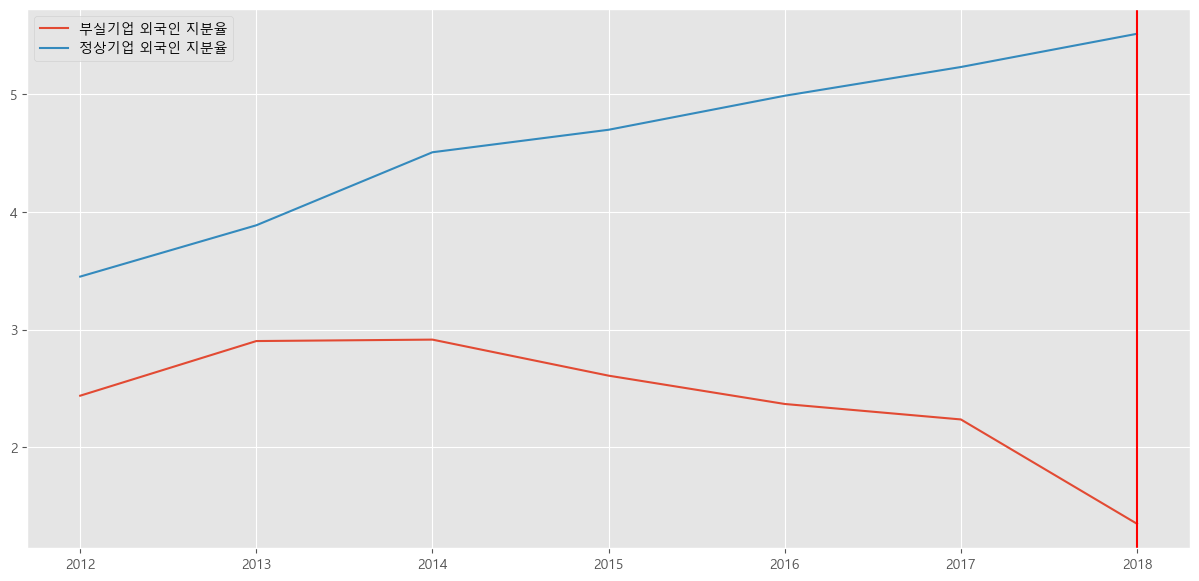

In [34]:
# 18년도 부도난 기업과 아닌 기업의의 외국인 지분율 변동 추이 

df_외국인_18 = df[(df["회계년도"]==2018)&(df["target_3"]==1)]
df_외국인_18_mean = df[(df["회사명"].isin(df_외국인_18["회사명"]))& (df["회계년도"]<=2018)].groupby(["회계년도"])["외국인지분율"].mean().reset_index()
df_외국인_18_0 = df[(df["회계년도"]==2018)&(df["target_3"]==0)]
df_외국인_18_mean_0 = df[(df["회사명"].isin(df_외국인_18_0["회사명"]))& (df["회계년도"]<=2018)].groupby(["회계년도"])["외국인지분율"].mean().reset_index()

plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.plot(df_외국인_18_mean["회계년도"],df_외국인_18_mean["외국인지분율"], label = "부실기업 외국인 지분율")
plt.plot(df_외국인_18_mean_0["회계년도"],df_외국인_18_mean_0["외국인지분율"], label = "정상기업 외국인 지분율")
plt.axvline(x = 2018, color = "r")
plt.legend()
plt.show()

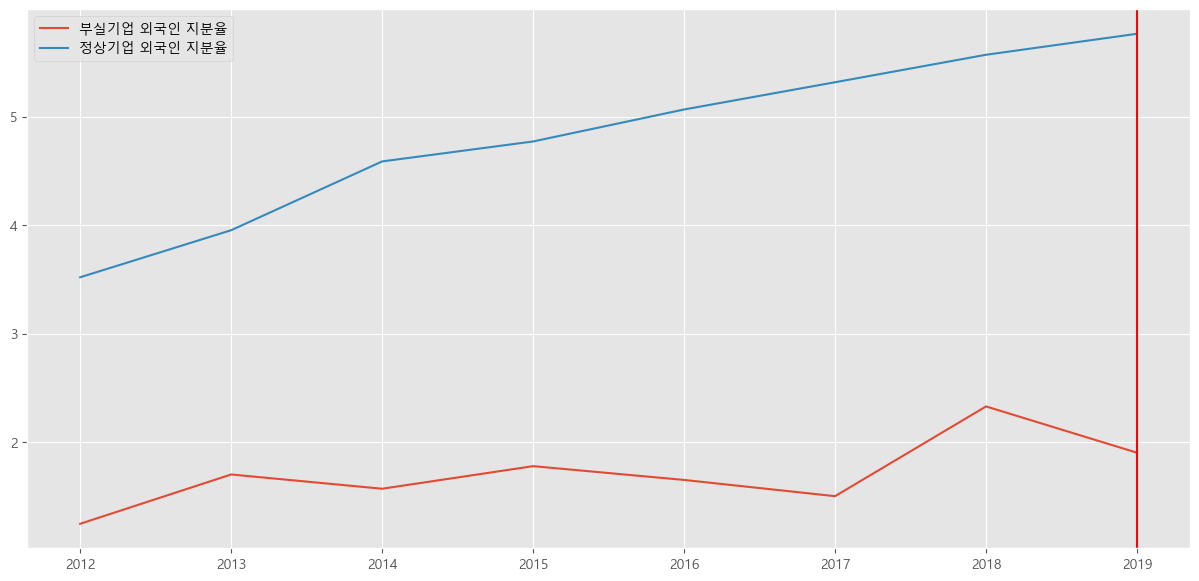

In [35]:
# 19년도 부도난 기업과 아닌 기업의의 외국인 지분율 변동 추이 

df_외국인_19 = df[(df["회계년도"]==2019)&(df["target_3"]==1)]
df_외국인_19_mean = df[(df["회사명"].isin(df_외국인_19["회사명"]))& (df["회계년도"]<=2019)].groupby(["회계년도"])["외국인지분율"].mean().reset_index()
df_외국인_19_0 = df[(df["회계년도"]==2019)&(df["target_3"]==0)]
df_외국인_19_mean_0 = df[(df["회사명"].isin(df_외국인_19_0["회사명"]))& (df["회계년도"]<=2019)].groupby(["회계년도"])["외국인지분율"].mean().reset_index()

plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.plot(df_외국인_19_mean["회계년도"],df_외국인_19_mean["외국인지분율"], label = "부실기업 외국인 지분율")
plt.plot(df_외국인_19_mean_0["회계년도"],df_외국인_19_mean_0["외국인지분율"], label = "정상기업 외국인 지분율")
plt.axvline(x = 2019, color = "r")
plt.legend()
plt.show()

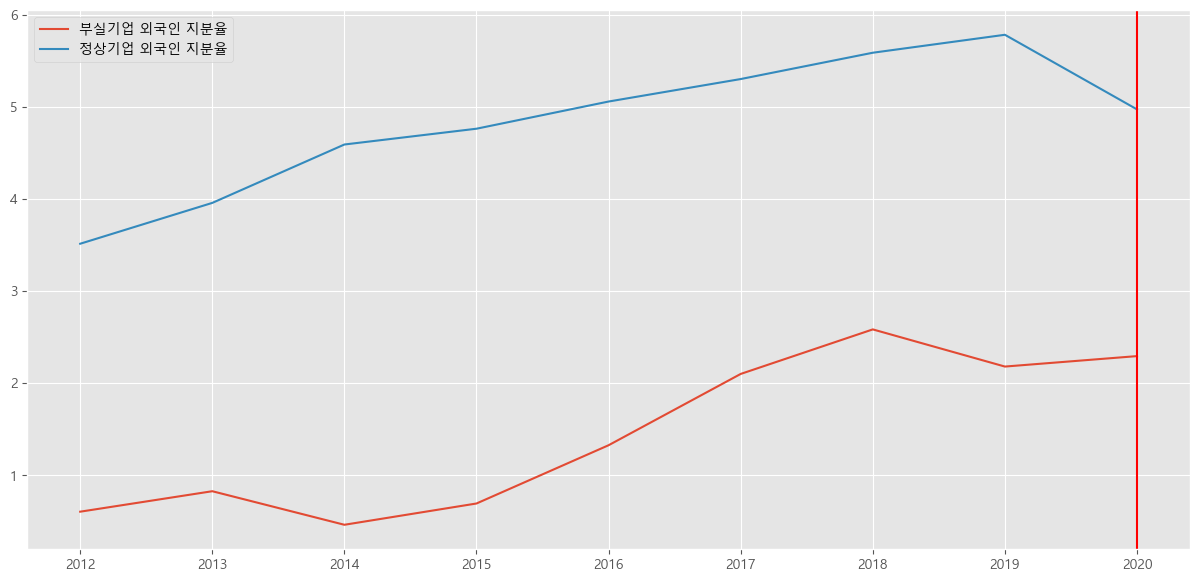

In [36]:
# 20년도 부도난 기업과 아닌 기업의의 외국인 지분율 변동 추이 

df_외국인_20 = df[(df["회계년도"]==2020)&(df["target_3"]==1)]
df_외국인_20_mean = df[(df["회사명"].isin(df_외국인_20["회사명"]))& (df["회계년도"]<=2020)].groupby(["회계년도"])["외국인지분율"].mean().reset_index()
df_외국인_20_0 = df[(df["회계년도"]==2020)&(df["target_3"]==0)]
df_외국인_20_mean_0 = df[(df["회사명"].isin(df_외국인_20_0["회사명"]))& (df["회계년도"]<=2020)].groupby(["회계년도"])["외국인지분율"].mean().reset_index()

plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.plot(df_외국인_20_mean["회계년도"],df_외국인_20_mean["외국인지분율"], label = "부실기업 외국인 지분율")
plt.plot(df_외국인_20_mean_0["회계년도"],df_외국인_20_mean_0["외국인지분율"], label = "정상기업 외국인 지분율")
plt.axvline(x = 2020, color = "r")
plt.legend()
plt.show()

---
## 계기판 만들기 도전

In [37]:
from pyecharts import options as opts
from pyecharts.charts import Gauge

value = 59
gauge = (
    Gauge()
    .add("", [("부실 Index", value)], split_number=4, axisline_opts=opts.AxisLineOpts(
        linestyle_opts=opts.LineStyleOpts(
            color=[(0.2, "#67e0e3"), (0.8, "#37a2da"), (1, "#fd666d")]
        )
    ))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Sum 부실 Index"),
        legend_opts=opts.LegendOpts(is_show=False),
        tooltip_opts=opts.TooltipOpts(formatter="{a} <br/>{b} : {c}"),
    )
)

gauge.render_notebook()


In [46]:
from pyecharts import options as opts
from pyecharts.charts import Gauge
from IPython.display import display
import ipywidgets as widgets

# 초기값 설정
value = 50

# 게이지 차트 객체 생성
gauge = (
    Gauge()
    .add("", [("부실 Index", value)], split_number=4, axisline_opts=opts.AxisLineOpts(
        linestyle_opts=opts.LineStyleOpts(
            color=[(0.2, "#67e0e3"), (0.8, "#37a2da"), (1, "#fd666d")]
        )
    ))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Sum 부실 Index"),
        legend_opts=opts.LegendOpts(is_show=False),
        tooltip_opts=opts.TooltipOpts(formatter="{a} <br/>{b} : {c}"),
    )
)

# 슬라이더 생성
slider = widgets.IntSlider(value=value, min=0, max=100, step=1, description='Value')

# 슬라이더 값이 변경될 때마다 실행되는 함수
def on_value_change(change):
    global value
    value = change['new']
    gauge.set_series_opts(data=[{"value": value}])

# 슬라이더 이벤트 핸들러 등록
slider.observe(on_value_change, names='value')


In [45]:
# 게이지 차트와 슬라이더를 출력
display(gauge.render_notebook())
display(slider)


IntSlider(value=65, description='Value')